In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline


Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Это распределение хи квадрат

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

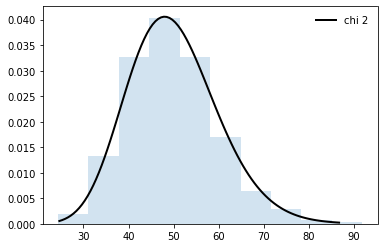

In [4]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

df = 50

x = np.linspace(chi2.ppf(0.001, df),
              chi2.ppf(0.999, df), 100)

rv = chi2(df)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='chi 2')

r = chi2.rvs(df, size=1000)

plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)



1) Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

2) Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

3)Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с 
параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [5]:
def run(n=5):

    #1
    l = []
    for i in range(1000):
        k = chi2.rvs(df, size=n)
        l.append(np.mean(k))
    k = plt.hist(l, density=True, histtype='stepfilled', alpha=0.61)
    
    #2
    mean = df
    std = (df*2/n)**(1/2)
    
    #3
    n = sts.norm(loc=mean,scale=std)
    x = np.linspace(n.ppf(0.001), n.ppf(0.999), 100)
    plt.plot(x, n.pdf(x), 'k-', lw=2, label='norm')


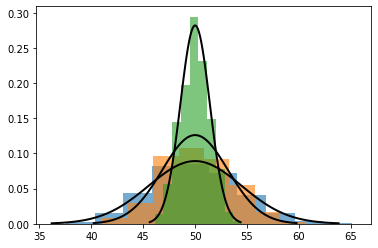

In [6]:
for i in [5,10,50]:
    run(i)

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

С ростом n уменьшаеться разброс std выборочных средних что дает более точный результат при большых n.